# Natural Language Processing Project
## Emotion Analysis from Facebook Messages
### Data Science, III semester, 2024Z
Authors: 

    Adam Czerwoński, no. 305809
    Maja Wasielewska, no. 335210
    Jędrzej Ruciński, no. 313527
    Jakub Kubacki, no. 313494

# This note features Exploratory Data Analysis (EDA) of a JSON file of Facebook messages. The goal is to analyze the data to gain insight into conversation patterns and emotional context.

### File intended for analysis of one conversation. -> Swap conversation files.

#### The plan for EDA:

1. Load and preprocess the data:
- Analyze the JSON file.
- Extract relevant fields: sender, timestamp, content.

2. Basic descriptive statistics:
- Count all messages.
- Identify unique participants.
- Analyze messages by participant.

3. Temporal analysis:
- Visualization of message frequency over time.
- Identification of peaks in message activity.

4. Text analysis:
- Calculation of average message length per participant.
- Detecting popular words and phrases (excluding stop words).
- Detecting positive and negative words.
- Perform sentiment analysis.

5. Visualization:
- Creating graphs to show the results.

In [1]:
# Import libraries
import json
import os
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Attention! 
## If you want to share data from this notebook:
### First, and this is the most important point, personally hide (rename) the folder names and names of the people you are having this conversation with for privacy purposes!:

#### Complete with your data! -> select the entire window with ctrl + a and deselect the file with ctrl + /

In [3]:
# # Paths and file names
# original_folder_path = '/mnt/data/original_folder'
# new_folder_path = '/mnt/data/anonymized_folder'
# input_file_name = 'messages_fb.json'
# output_file_name = 'john_doe_messages_fb_anonymized.json'

# # Specify the name to anonymize and the replacement
# name_to_anonymize = "Original Name"  # Replace with the real name
# anonymized_name = "Anonymous"

# # Create the new folder if it doesn't exist
# os.makedirs(new_folder_path, exist_ok=True)

# # Full paths for input and output files
# input_file_path = os.path.join(original_folder_path, input_file_name)
# output_file_path = os.path.join(new_folder_path, output_file_name)

# # Function to fix incorrectly encoded text
# def fix_encoding(text):
#     try:
#         return text.encode('latin1').decode('utf-8')
#     except (UnicodeEncodeError, UnicodeDecodeError):
#         return text  # If fixing fails, return the original text

# # Load the JSON file
# with open(input_file_path, 'r', encoding='utf-8') as file:
#     data = json.load(file)

# # Update the participant's name in the participants list
# for participant in data.get('participants', []):
#     if participant['name'] == name_to_anonymize:
#         participant['name'] = anonymized_name
#     # Fix encoding for all participant names
#     participant['name'] = fix_encoding(participant['name'])

# # Update "sender_name" in messages and fix encoding for "content"
# for message in data.get('messages', []):
#     if message.get('sender_name') == name_to_anonymize:
#         message['sender_name'] = anonymized_name
#     # Fix encoding for sender_name and content
#     message['sender_name'] = fix_encoding(message.get('sender_name', ''))
#     if 'content' in message:
#         message['content'] = fix_encoding(message['content'])

# # Save the updated data to the new folder
# with open(output_file_path, 'w', encoding='utf-8') as file:
#     json.dump(data, file, ensure_ascii=False, indent=4)

# print(f"Anonymization complete.\n\nUpdated file saved to:\n {output_file_path}")

In [4]:
# Install:
# !python -m spacy download pl_core_news_sm

'''The command !python -m spacy download pl_core_news_sm is used to download and install the Polish language model for SpaCy. This model provides tools for natural language processing tasks specifically tailored to the Polish language, such as tokenization, part-of-speech tagging and lemmatization.'''

'The command !python -m spacy download pl_core_news_sm is used to download and install the Polish language model for SpaCy. This model provides tools for natural language processing tasks specifically tailored to the Polish language, such as tokenization, part-of-speech tagging and lemmatization.'

In [5]:
# Load Polish SpaCy model
pl_core_news_sm = spacy.load("pl_core_news_sm")

In [6]:
# Download NLTK data
nltk.download('punkt')

# Load the JSON file -> your Facebook messages with one person
file_path = r'D:\PW3SEM\NLP\Natural-Language-Processing_Project\private_chats\anonymized_chats\krzysiekn\messages_krzysiekn_anonymized.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Decode garbled text, JSON file contains 'Czy og\u00c3\u00b3lnie', instead of 'Czy ogólnie'
def decode_text(content):
    try:
        return content.encode('latin1').decode('utf-8')
    except:
        return content  # If decoding fails, return original content

# Extract messages into a DataFrame
messages = data.get('messages', [])
df = pd.DataFrame(messages)

# Decode the content field
df['content'] = df['content'].apply(lambda x: decode_text(x) if isinstance(x, str) else x)

Total Messages: 722
Participants: ['Krzysiek N.', 'Maja Wasielewska']

Messages Per Participant:
sender_name
Maja Wasielewska    365
Krzysiek N.         357
Name: count, dtype: int64


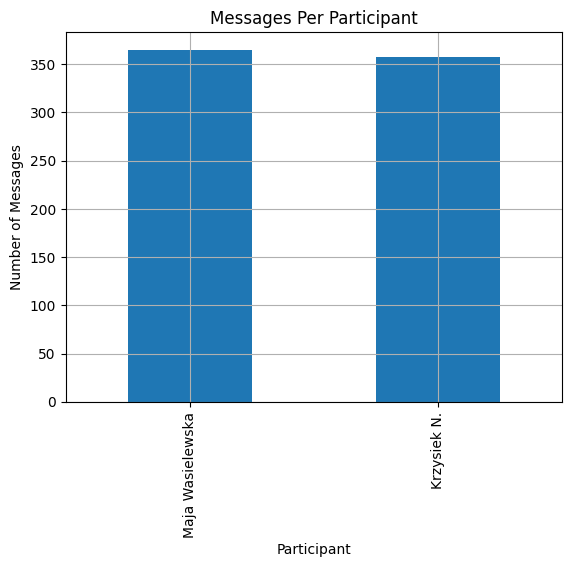

In [8]:
# Descriptive statistics
print(f"Total Messages: {len(df)}")
participants = [participant['name'] for participant in data.get('participants', [])]
print(f"Participants: {participants}")
messages_per_participant = df['sender_name'].value_counts()
print(f"\nMessages Per Participant:\n{messages_per_participant}")

# Plot messages per participant
messages_per_participant.plot(kind='bar', title="Messages Per Participant")
plt.xlabel("Participant")
plt.ylabel("Number of Messages")
plt.grid(True)
plt.show()

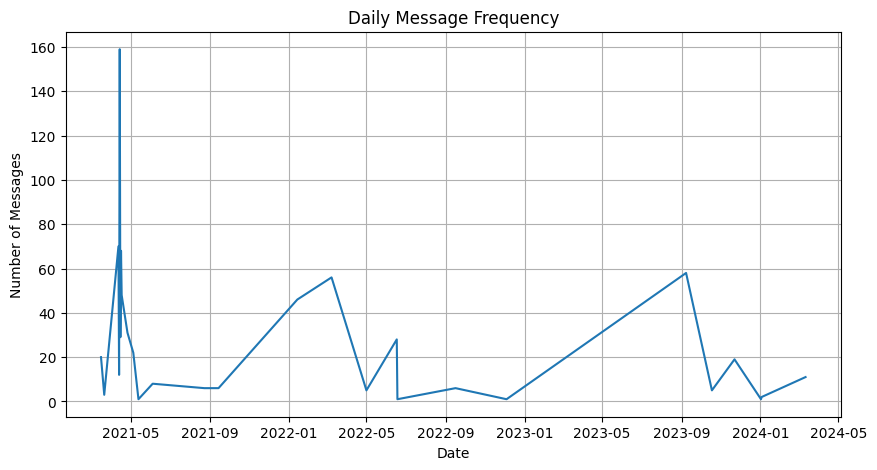

In [9]:
# Plot messages over time
df['timestamp_ms'] = pd.to_datetime(df['timestamp_ms'], unit='ms')
df['date'] = df['timestamp_ms'].dt.date
daily_messages = df.groupby('date').size()
plt.figure(figsize=(10, 5))
daily_messages.plot()
plt.title("Daily Message Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.grid(True)
plt.show()

Average Message Length Per Participant:
sender_name
Krzysiek N.         30.126050
Maja Wasielewska    28.917808
Name: message_length, dtype: float64


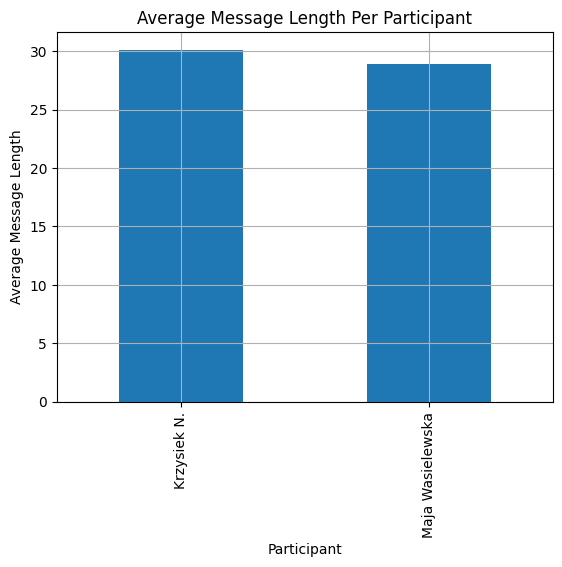

In [10]:
# Message length analysis
df['message_length'] = df['content'].apply(lambda x: len(x) if isinstance(x, str) else 0)
avg_length_per_participant = df.groupby('sender_name')['message_length'].mean()
print(f"Average Message Length Per Participant:\n{avg_length_per_participant}")

# Plot average message length per participant
avg_length_per_participant.plot(kind='bar', title="Average Message Length Per Participant")
plt.xlabel("Participant")
plt.ylabel("Average Message Length")
plt.grid(True)
plt.show()

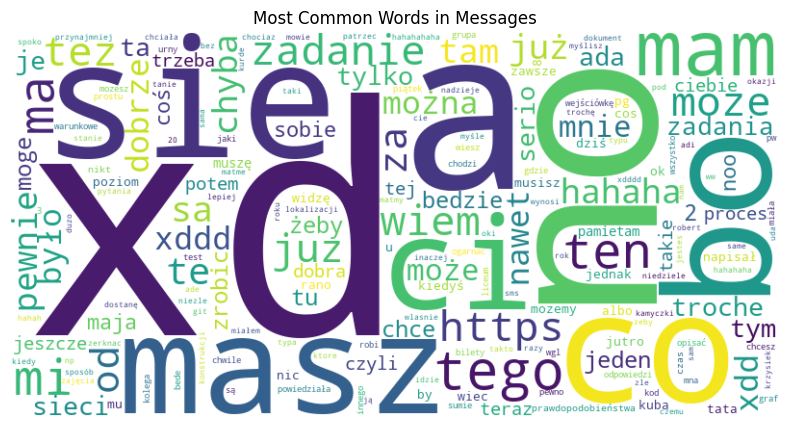

In [11]:
# Define Polish stopwords
polish_stopwords = [
    'i', 'oraz', 'ale', 'ponieważ', 'więc', 'że', 'który', 'która', 'którzy', 
    'to', 'jest', 'był', 'będzie', 'być', 'na', 'z', 'o', 'do', 'dla', 'po', 
    'przez', 'przy', 'w', 'ze', 'nie', 'tak', 'jak', 'czy', 'się', 'ja', 'my', 
    'ty', 'wy', 'on', 'ona', 'ono', 'oni', 'one', 'jego', 'jej', 'ich', 'mój', 
    'twoje', 'wasz', 'nasz'
]

stop_words = set(polish_stopwords)

# Tokenize content and filter stopwords
def tokenize_polish(text):
    return [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Generate Word Cloud
all_words = ' '.join(df['content'].dropna())
filtered_words = [word for word in tokenize_polish(all_words)]

word_freq = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Messages")
plt.show()

Sentiment Distribution:

sentiment_label
neutral     707
positive     13
negative      2
Name: count, dtype: int64

Positive Words Found in Messages:
{'dobry', 'dobra', 'lepszy', 'miłej', 'super', 'najlepszego', 'dobre', 'najlepszej'}

Negative Words Found in Messages:
{'zły'}


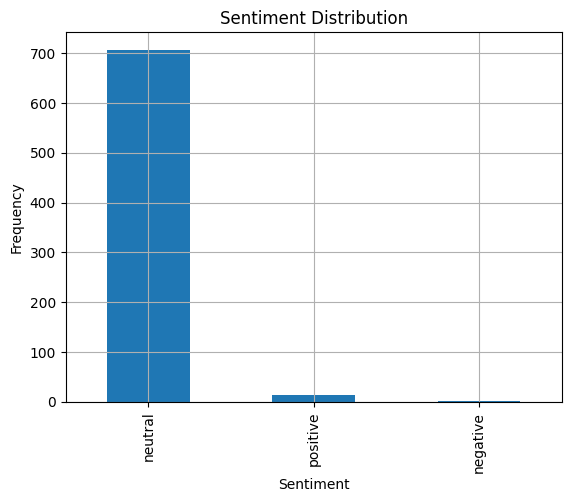

In [12]:
# Expanded word lists with base forms (lemmas)
positive_words = [
    'dobry', 'świetny', 'wspaniały', 'genialny', 'super', 'niesamowity', 
    'cudowny', 'fantastyczny', 'wyśmienity', 'przepiękny', 'zachwycający', 
    'miły', 'radosny', 'szczęśliwy', 'entuzjastyczny', 'ekscytujący', 
    'udany', 'idealny', 'pozytywny', 'kojący', 'przyjemny', 'spokojny', 
    'komfortowy', 'znakomity', 'harmonijny', 'łagodny', 'dumny', 'pomocny', 
    'hojny', 'życzliwy', 'wdzięczny', 'zrelaksowany', 'satysfakcjonujący', 
    'doskonały', 'przyjazny', 'otwarty', 'uprzejmy', 'opiekuńczy', 
    'inspirujący', 'sympatyczny', 'uroczy', 'ciepły', 'uczciwy', 'niezawodny'
]

negative_words = [
    'zły', 'tragiczny', 'okropny', 'straszny', 'przerażający', 'koszmarny', 
    'fatalny', 'paskudny', 'żałosny', 'negatywny', 'smutny', 'żałujący', 
    'przygnębiony', 'rozczarowany', 'nieszczęśliwy', 'irytujący', 'zniechęcony', 
    'nieprzyjemny', 'chaotyczny', 'toksyczny', 'destrukcyjny', 'bezradny', 
    'złośliwy', 'niewdzięczny', 'zawstydzony', 'obrażony', 'nieufny', 
    'niekomfortowy', 'niemiły', 'nieprzyjazny', 'niesprawiedliwy', 'nieżyczliwy', 
    'beznadziejny', 'apatyczny', 'wściekły', 'rozpaczliwy', 'nerwowy', 
    'zmartwiony', 'zrozpaczony', 'samotny', 'niepewny', 'niezadowolony', 
    'frustrujący', 'irytujący', 'kłótliwy', 'wrogi', 'niebezpieczny', 
    'niespokojny', 'krytyczny', 'krzywdzący', 'niecierpliwy', 'złośliwy'
]

# Function to analyze sentiment with lemmatization
def analyze_sentiment_with_lemmatization(text):
    doc = pl_core_news_sm(text.lower())
    positive = sum(1 for token in doc if token.lemma_ in positive_words)
    negative = sum(1 for token in doc if token.lemma_ in negative_words)
    if positive > negative:
        return 'positive'
    elif negative > positive:
        return 'negative'
    return 'neutral'

# Apply sentiment analysis to the dataset
df['sentiment_label'] = df['content'].apply(
    lambda x: analyze_sentiment_with_lemmatization(x) if isinstance(x, str) else None
)

# View sentiment results
sentiment_counts = df['sentiment_label'].value_counts()
print("Sentiment Distribution:\n")
print(sentiment_counts)

# Extract positive and negative messages
positive_messages = df[df['sentiment_label'] == 'positive']['content']
negative_messages = df[df['sentiment_label'] == 'negative']['content']

# Extract positive and negative words from the respective messages
positive_words_in_messages = []
negative_words_in_messages = []

for content in positive_messages.dropna():
    doc = pl_core_news_sm(content.lower())
    positive_words_in_messages.extend([token.text for token in doc if token.lemma_ in positive_words])

for content in negative_messages.dropna():
    doc = pl_core_news_sm(content.lower())
    negative_words_in_messages.extend([token.text for token in doc if token.lemma_ in negative_words])

# Unique words
unique_positive_words_in_messages = set(positive_words_in_messages)
unique_negative_words_in_messages = set(negative_words_in_messages)

# Print unique positive and negative words
print("\nPositive Words Found in Messages:")
print(unique_positive_words_in_messages)

print("\nNegative Words Found in Messages:")
print(unique_negative_words_in_messages)

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()